In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.4, font="Plus Jakarta Sans")
%config InlineBackend.figure_format = 'retina' 

In [88]:
def get_data(file_path: str, location_label: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df['depth_decibar_inverted'] = -df['depth_decibar']
    df['location'] = location_label
    return df

# Godthul case study

In [58]:
df_gothul = pd.read_csv('data/MOANA_0161_52_231008_godthul.csv')
df_gothul['depth_decibar_inverted'] = -df_gothul['depth_decibar']
df_gothul['location'] = 'Godthul'
df_gothul.head()

,date,time,depth_decibar,temp_c,reading,depth_decibar_inverted,location
0,06/10/2023,14:02:56,1.1,1.214,1,-1.1,Godthul
1,06/10/2023,14:03:04,2.2,0.836,1,-2.2,Godthul
2,06/10/2023,14:03:09,3.5,0.692,1,-3.5,Godthul
3,06/10/2023,14:03:13,4.8,0.651,1,-4.8,Godthul
4,06/10/2023,14:03:24,5.9,0.618,1,-5.9,Godthul


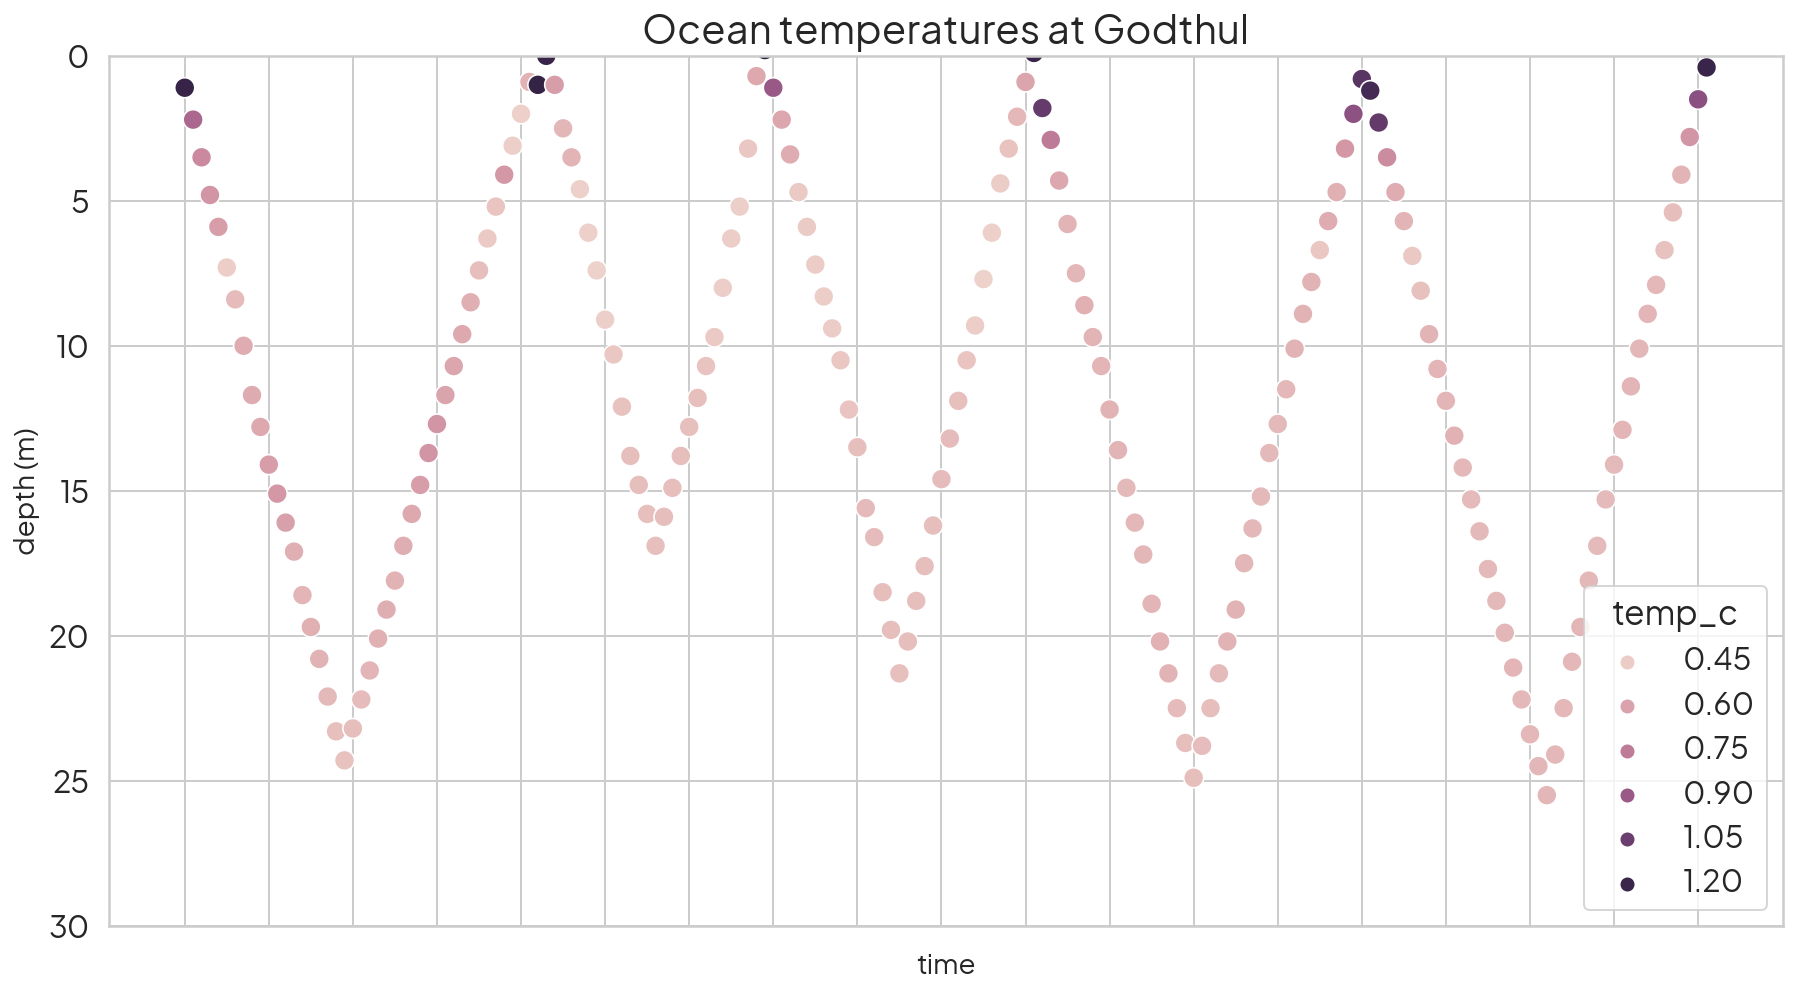

In [55]:
data_subset = df_gothul
plt.figure(figsize=(15, 8))
ax = sns.scatterplot(x='time', y='depth_decibar', data=data_subset, hue='temp_c', s=100)
ax.set_title('Ocean temperatures at Godthul', fontsize = 20)
ax.set_xlabel('time', fontsize = 14) 
ax.set_ylim((30, 0)) 
ax.set_ylabel('depth (m)', fontsize = 14)

xticks_subset = ax.get_xticks()[0:-1:10]
xticklabels_subset = ax.get_xticklabels()[0:-1:10]
ax.set_xticks(xticks_subset, labels=xticklabels_subset)
plt.savefig('plots/231008_godthul_over_time.png', dpi=150)
plt.show()

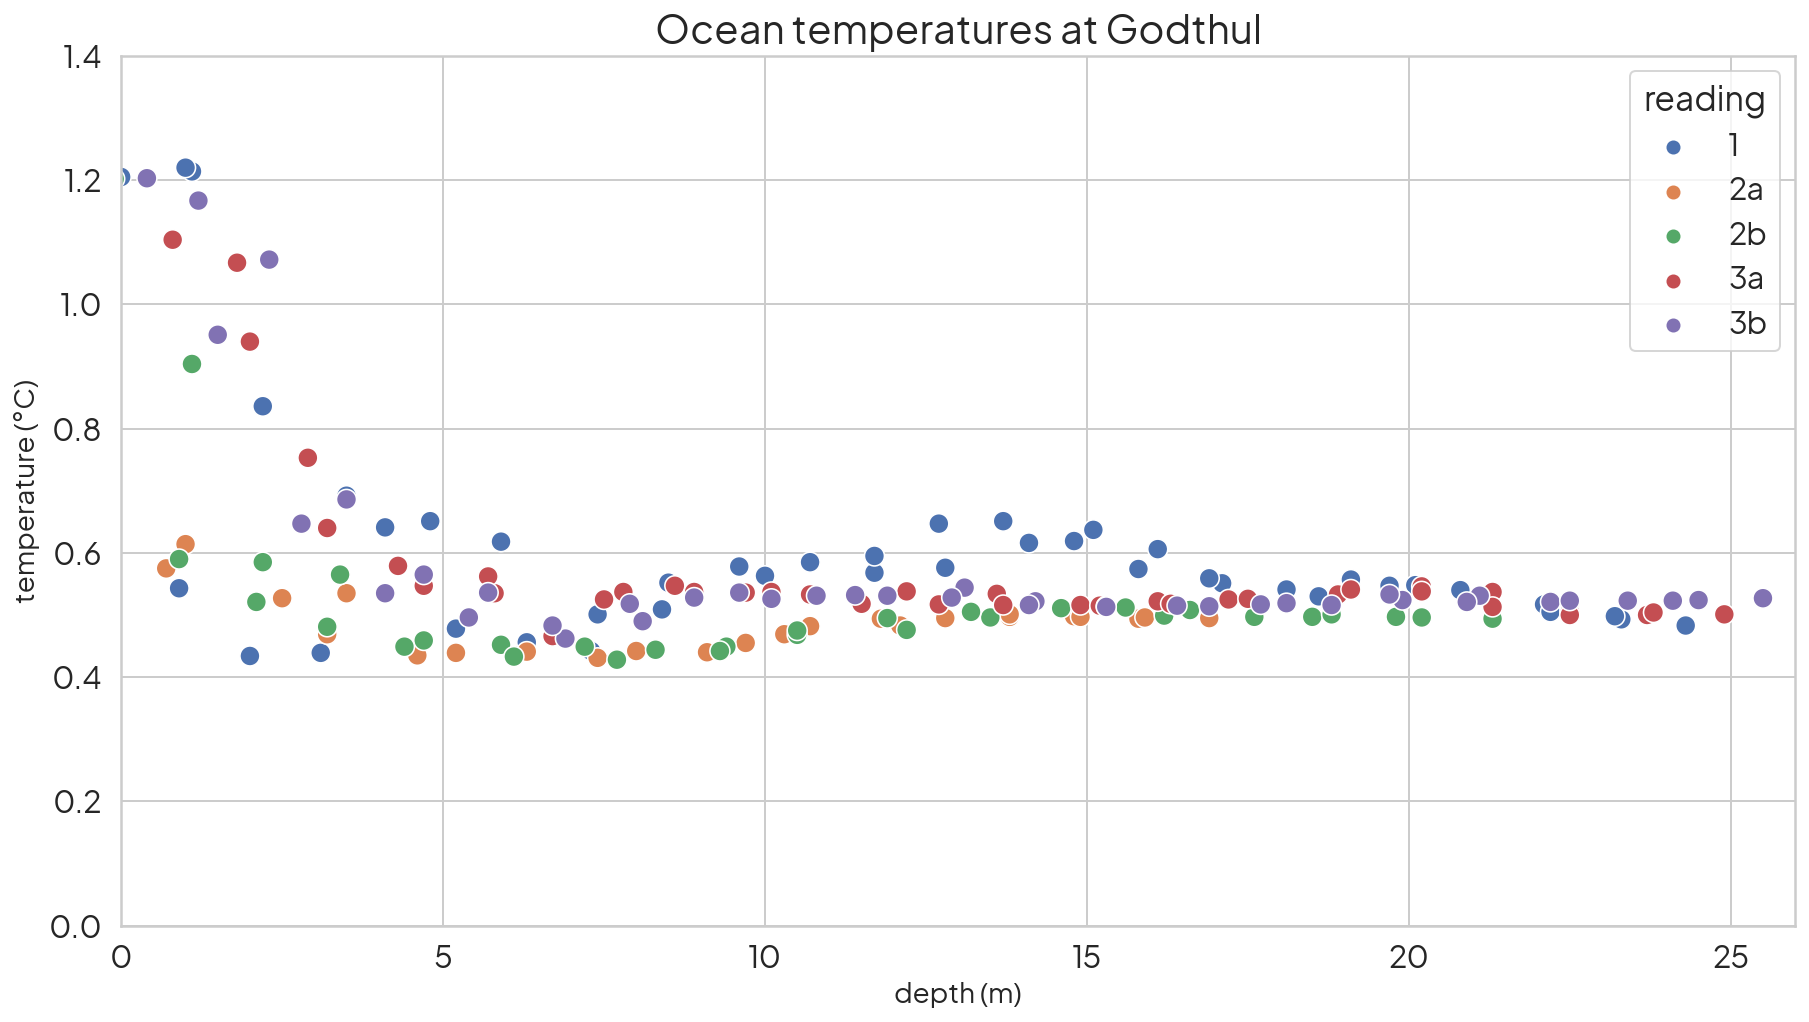

In [56]:
data_subset = df_gothul
plt.figure(figsize=(15, 8))
ax = sns.scatterplot(
    x='depth_decibar',
    y='temp_c',
    data=data_subset,
    hue='reading',
    s=100)
ax.set_title('Ocean temperatures at Godthul', fontsize = 20)
ax.set_xlabel('depth (m)', fontsize = 14) 
ax.set_xlim((0, 26)) 
ax.set_ylabel('temperature (°C)', fontsize = 14)
ax.set_ylim((0, 1.4)) 

plt.savefig('plots/231008_godthul_all_time.png', dpi=150)
plt.show()

## Drygalski Fjord

In [66]:
df_drygalski = pd.read_csv('data/MOANA_0161_54_231009_drygalski.csv')
df_drygalski['depth_decibar_inverted'] = -df_drygalski['depth_decibar']
df_drygalski['location'] = 'Drygalski fjord'
df_drygalski.head()

,date,time,depth_decibar,temp_c,reading,depth_decibar_inverted,location
0,07/10/2023,18:48:04,0.7,0.876,1,-0.7,Drygalski fjord
1,07/10/2023,18:48:06,1.8,0.365,1a,-1.8,Drygalski fjord
2,07/10/2023,18:48:08,3.4,0.288,1a,-3.4,Drygalski fjord
3,07/10/2023,18:48:11,4.9,0.247,1a,-4.9,Drygalski fjord
4,07/10/2023,18:48:12,6.1,0.247,1a,-6.1,Drygalski fjord


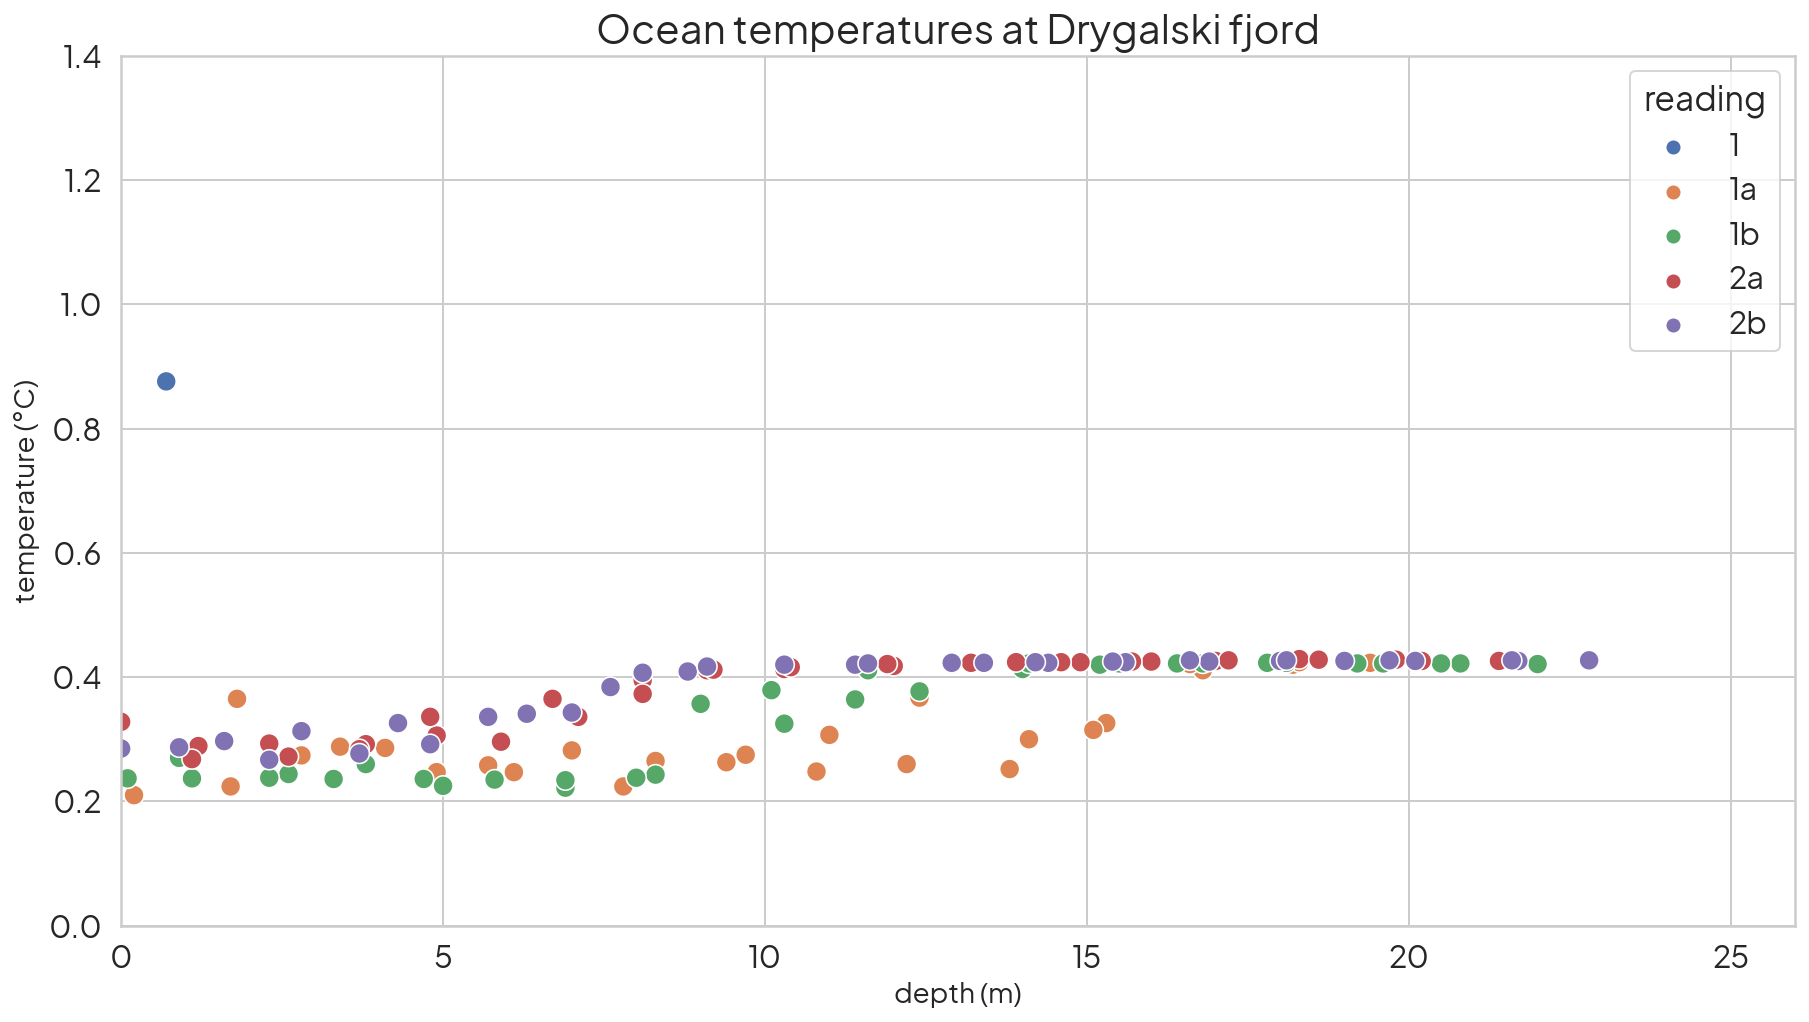

In [67]:
data_subset = df_drygalski
plt.figure(figsize=(15, 8))
ax = sns.scatterplot(
    x='depth_decibar',
    y='temp_c',
    data=data_subset,
    hue='reading',
    s=100)
ax.set_title('Ocean temperatures at Drygalski fjord', fontsize = 20)
ax.set_xlabel('depth (m)', fontsize = 14) 
ax.set_xlim((0, 26)) 
ax.set_ylabel('temperature (°C)', fontsize = 14)
ax.set_ylim((0, 1.4)) 

plt.savefig('plots/231009_drygalski_all_time.png', dpi=150)
plt.show()

## Godthul vs Drygalski

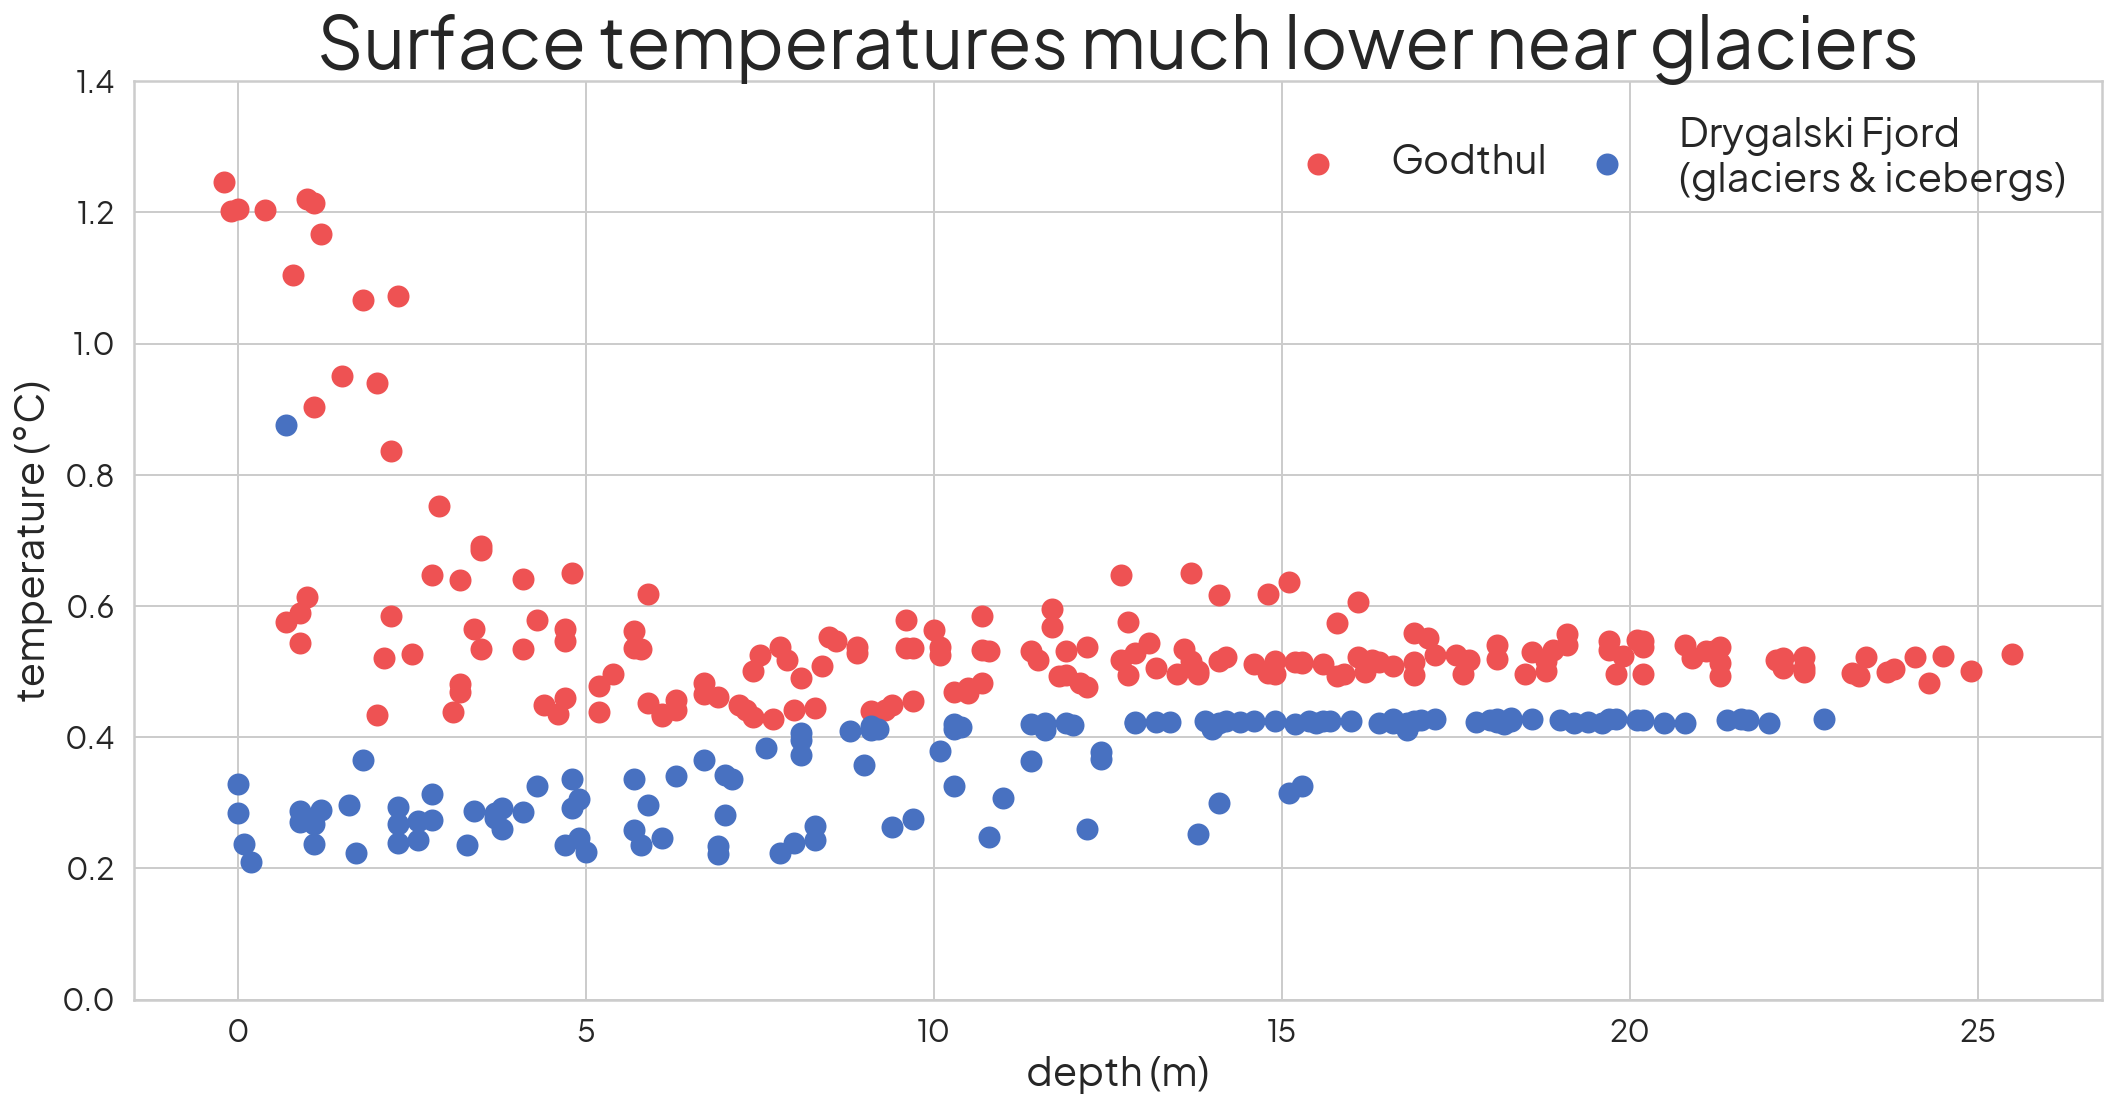

In [94]:
fig = plt.figure(figsize=(15, 8), tight_layout=True)
ax = fig.subplots(1,1)
# ax = sns.scatterplot(x='depth_decibar', y='temp_c', data=data_subset, hue='location', s=100)
ax.scatter(x='depth_decibar', y='temp_c', data=df_gothul, c='#EE5253', s=100, label='Godthul')
ax.scatter(x='depth_decibar', y='temp_c', data=df_drygalski, c='#4871C1', s=100, label='Drygalski Fjord\n(glaciers & icebergs)')
ax.set_title('Surface temperatures much lower near glaciers', fontsize = 36)
ax.set_xlabel('depth (m)', fontsize = 20) 
ax.set_ylim((0, 1.4)) 
ax.set_ylabel('temperature (°C)', fontsize = 20)

plt.legend(frameon=False, ncol=2, columnspacing=0.5, fontsize=20)
plt.savefig('plots/godthul_vs_drygalski.png', dpi=150)
plt.show()

## Multiple locations

In [90]:
df_ocean_harbour = get_data('data/MOANA_0161_55_231010_ocean_harbour.csv', 'Ocean Harbour')
df_ocean_harbour.head()

,date,time,depth_decibar,temp_c,reading,depth_decibar_inverted,location
0,08/10/2023,21:14:17,1.2,0.907,1a,-1.2,Ocean Harbour
1,08/10/2023,21:14:18,2.5,0.801,1a,-2.5,Ocean Harbour
2,08/10/2023,21:14:20,3.7,0.708,1a,-3.7,Ocean Harbour
3,08/10/2023,21:14:22,5.5,0.632,1a,-5.5,Ocean Harbour
4,08/10/2023,21:14:24,7.0,0.511,1a,-7.0,Ocean Harbour


In [91]:
df_elsehul = get_data('data/MOANA_0161_55_231011_elsehul.csv', 'Elsehul')
df_elsehul.head()

,date,time,depth_decibar,temp_c,reading,depth_decibar_inverted,location
0,09/10/2023,13:16:31,0.8,1.022,1a,-0.8,Elsehul
1,09/10/2023,13:16:34,2.0,1.023,1a,-2.0,Elsehul
2,09/10/2023,13:16:38,3.2,0.983,1a,-3.2,Elsehul
3,09/10/2023,13:16:41,4.5,0.866,1a,-4.5,Elsehul
4,09/10/2023,13:16:43,6.0,0.825,1a,-6.0,Elsehul


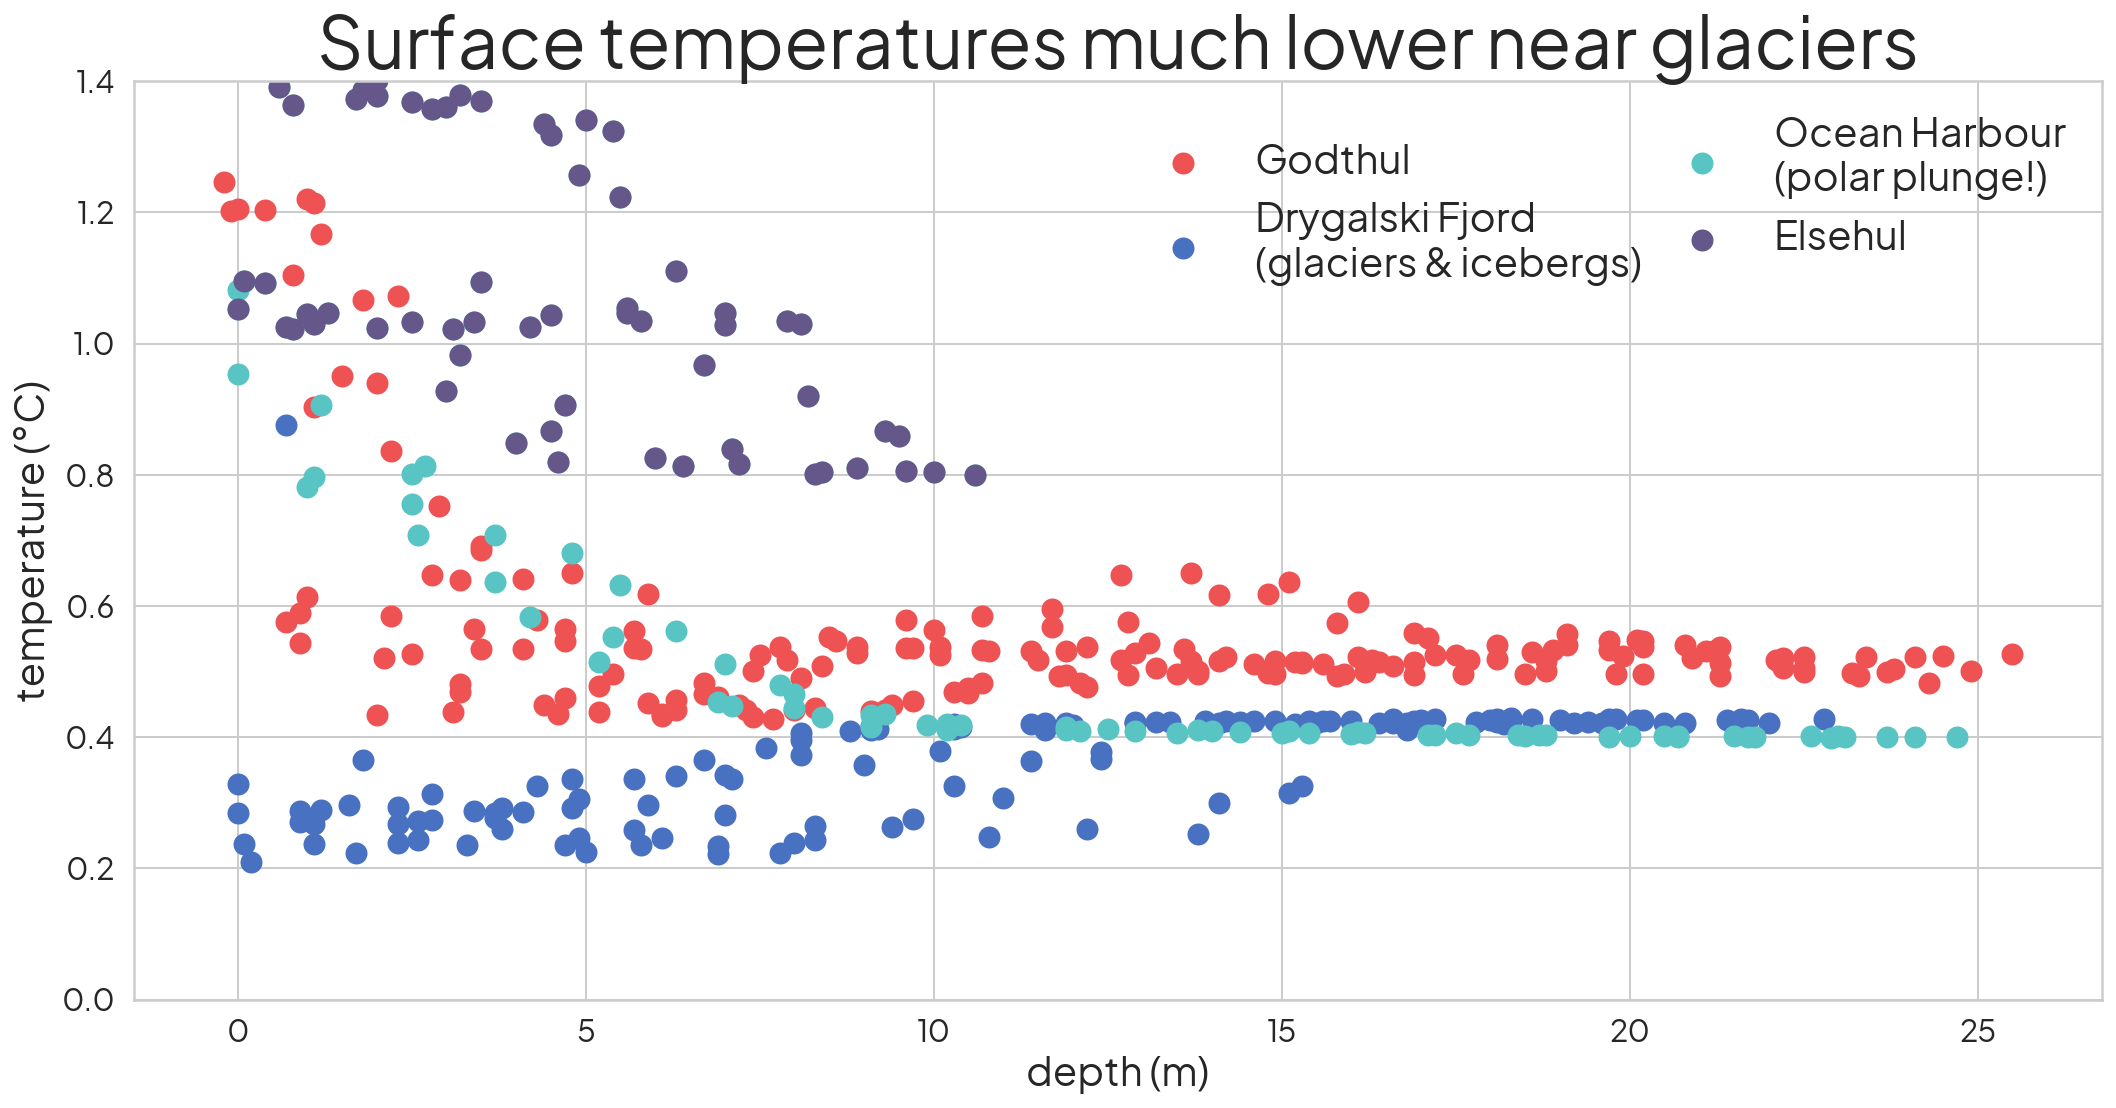

In [100]:
fig = plt.figure(figsize=(15, 8), tight_layout=True)
ax = fig.subplots(1,1)
ax.scatter(x='depth_decibar', y='temp_c', data=df_gothul, c='#EE5253', s=100, label='Godthul')
ax.scatter(x='depth_decibar', y='temp_c', data=df_drygalski, c='#4871C1', s=100, label='Drygalski Fjord\n(glaciers & icebergs)')
ax.scatter(x='depth_decibar', y='temp_c', data=df_ocean_harbour, c='#59C4C4', s=100, label='Ocean Harbour\n(polar plunge!)')
ax.scatter(x='depth_decibar', y='temp_c', data=df_elsehul, c='#66578B', s=100, label='Elsehul')
ax.set_title('Surface temperatures much lower near glaciers', fontsize = 36)
ax.set_xlabel('depth (m)', fontsize = 20) 
ax.set_ylim((0, 1.4)) 
ax.set_ylabel('temperature (°C)', fontsize = 20)

plt.legend(frameon=False, ncol=2, columnspacing=0.5, fontsize=20)
plt.savefig('plots/all_locations.png', dpi=150)
plt.show()